<a href="https://colab.research.google.com/github/rupasri-2005/AI_Price_Optima/blob/main/AI_Price_Optima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [2]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [3]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [6]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

## This function tells us how many unique values exist in each column which provides insight into the variety of data in each feature.

In [7]:
df.nunique()

,0
Number_of_Riders,81
Number_of_Drivers,79
Location_Category,3
Customer_Loyalty_Status,3
Number_of_Past_Rides,101
Average_Ratings,151
Time_of_Booking,4
Vehicle_Type,2
Expected_Ride_Duration,171
Historical_Cost_of_Ride,1000


In [8]:
# 2) Missing Values & Duplicates
missing_counts = df.isnull().sum().sort_values(ascending=False)
dupe_count = df.duplicated().sum()

print("\nMissing values by column:\n", missing_counts)
print("\nDuplicate rows:", dupe_count)

# Decision: since there are no missings/dupes in your file, no imputations/drops needed.
# If there were, here are templates you could use later:
# df = df.drop_duplicates()
# df['SomeNumeric'] = df['SomeNumeric'].fillna(df['SomeNumeric']. median())
# df['SomeCategory'] =df['SomeCategory'].fillna('Unknown')


Missing values by column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Duplicate rows: 0


In [9]:

# 3) Data Types & Intended Conversions
# Confirm numeric vs categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]). columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# If any date columns existed, example:
# df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Ensure categoricals are category dtype (memory + clarity)
for c in cat_cols:
  df[c] = df[c].astype('category')

print("\nDtypes after casting categoricals:")
print(df.dtypes)

Numeric columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Dtypes after casting categoricals:
Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category          category
Customer_Loyalty_Status    category
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type               category
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object


In [10]:
import numpy as np

# Function to detect outliers using IQR
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

# Apply to all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

    # Show first few outliers
    if not outliers.empty:
        print(outliers[[col]].head())



Column: Number_of_Riders
Lower Bound: -21.5, Upper Bound: 142.5
Number of Outliers: 0

Column: Number_of_Drivers
Lower Bound: -29.5, Upper Bound: 78.5
Number of Outliers: 10
     Number_of_Drivers
42                  81
53                  84
140                 80
294                 80
663                 87

Column: Number_of_Past_Rides
Lower Bound: -50.0, Upper Bound: 150.0
Number of Outliers: 0

Column: Average_Ratings
Lower Bound: 2.72625, Upper Bound: 5.776250000000001
Number of Outliers: 0

Column: Expected_Ride_Duration
Lower Bound: -65.125, Upper Bound: 267.875
Number of Outliers: 0

Column: Historical_Cost_of_Ride
Lower Bound: -212.33325012902748, Upper Bound: 944.1959566799039
Number of Outliers: 0


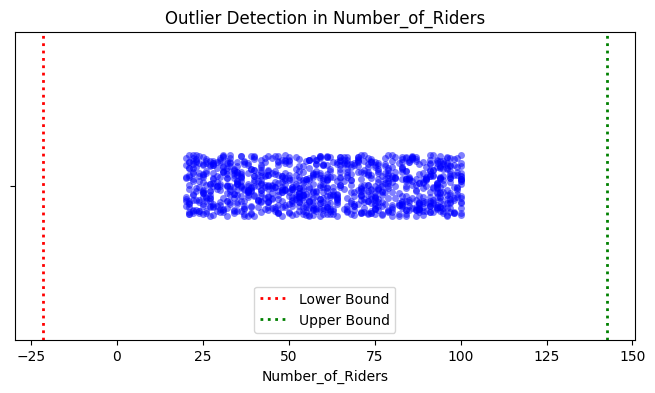

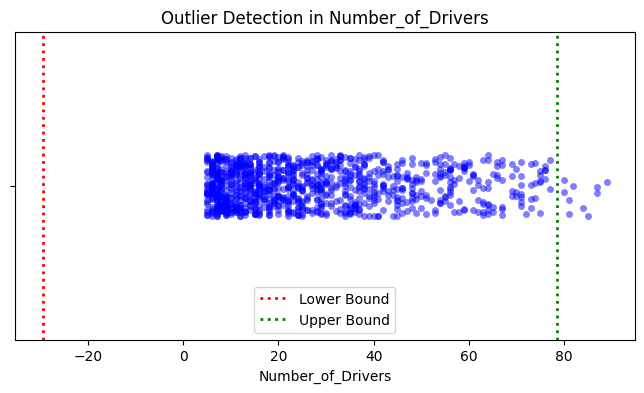

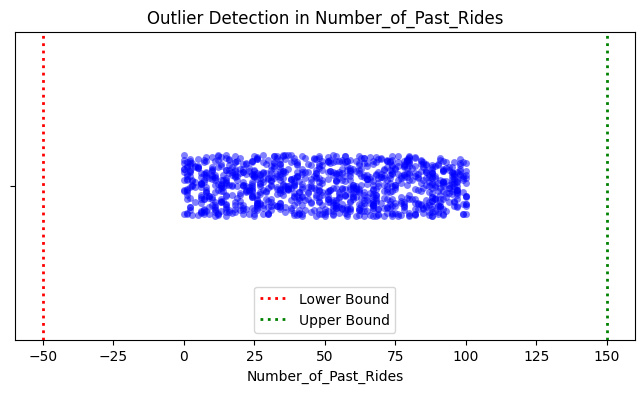

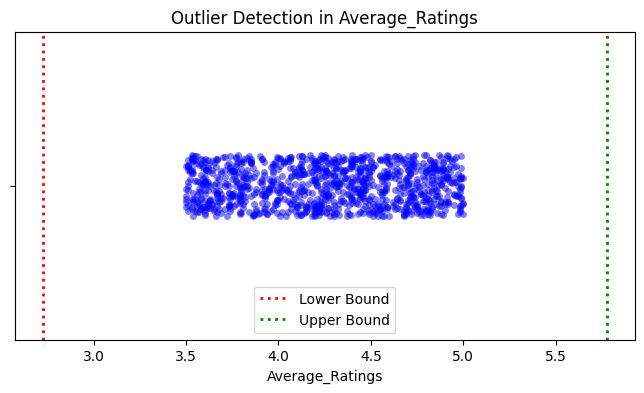

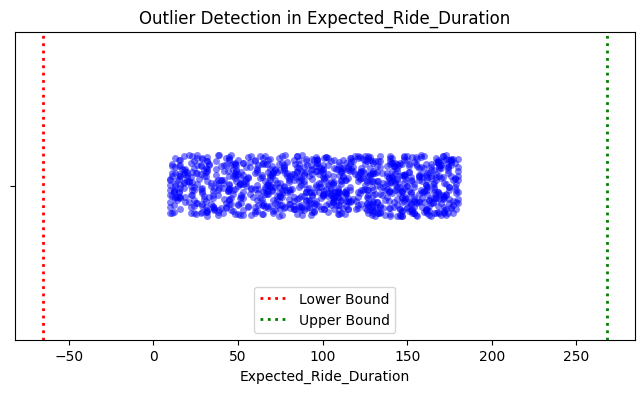

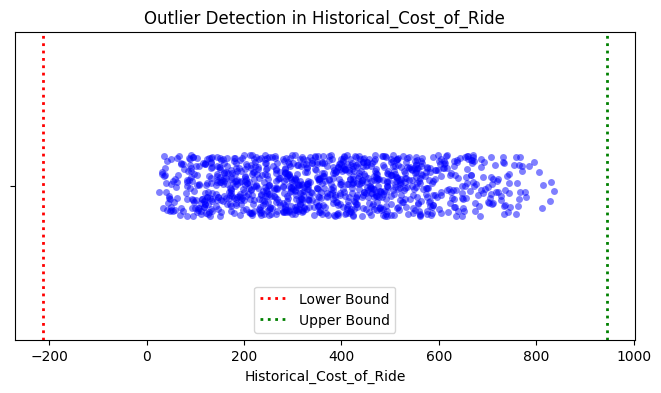

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot outliers with dotted lines
def plot_outliers_with_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    plt.figure(figsize=(8,4))
    sns.stripplot(x=data[col], color="blue", alpha=0.5, jitter=True)

    # Add dotted lines for thresholds
    plt.axvline(lower, color="red", linestyle="dotted", linewidth=2, label="Lower Bound")
    plt.axvline(upper, color="green", linestyle="dotted", linewidth=2, label="Upper Bound")

    plt.title(f"Outlier Detection in {col}")
    plt.legend()
    plt.show()

# Apply to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    plot_outliers_with_iqr(df, col)



In [12]:
# ===================================
# Preprocessing Pipeline
# ===================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Remove duplicates
df = df.drop_duplicates()

# 2. Handle missing values (if any)
# Numeric -> fill with median, Categorical -> fill with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 3. Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Feature scaling (normalize numerical features)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 5. Train-test split
X = df.drop("Historical_Cost_of_Ride", axis=1)  # Features
y = df["Historical_Cost_of_Ride"]               # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Preprocessing complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


✅ Preprocessing complete!
X_train shape: (800, 9)
X_test shape: (200, 9)


/tmp/ipython-input-1424866703.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1424866703.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [13]:
# --- KPIS ---
# Completed rides = min(Riders, Drivers)
df["Completed_Rides"] = df[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

# Cost assumption (e.g., 70% of ride price is cost -> driver payout, fuel, fees)
df["Cost_per_Ride"] = 0.7 * df["Historical_Cost_of_Ride"]

# If we simulate new prices, create a placeholder column (here, +10% as example)
df["Recommended_Price"] = df["Historical_Cost_of_Ride"] * 1.10

# --- 1. Revenue (₹) ---
df["Revenue"] = df["Historical_Cost_of_Ride"] * df["Completed_Rides"]

# --- 2. Profit (₹) ---
df["Profit"] = (df["Historical_Cost_of_Ride"] - df["Cost_per_Ride"]) * df["Completed_Rides"]

# --- 3. Revenue Lift (%) ---
baseline_revenue = (df["Historical_Cost_of_Ride"] * df["Completed_Rides"]).sum()
recommended_revenue = (df["Recommended_Price"] * df["Completed_Rides"]).sum()
df_kpi_revenue_lift = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100

# --- 4. Gross Margin (%) ---
df["Gross_Margin"] = ((df["Revenue"] - df["Cost_per_Ride"] * df["Completed_Rides"]) / df["Revenue"]) * 100

# --- 5. Conversion Rate (%) ---
df["Conversion_Rate"] = (df["Completed_Rides"] / df["Number_of_Riders"]) * 100

# --- 6. Price Change Rate (%) ---
df["Price_Changed"] = df["Historical_Cost_of_Ride"] != df["Recommended_Price"]
price_change_rate = df["Price_Changed"].sum() / len(df) * 100

# --- 7. Cancellation Rate (%) ---
# Approximated as unmet demand (riders who didn't get a driver)
df["Cancelled_Rides"] = df["Number_of_Riders"] - df["Completed_Rides"]
df["Cancellation_Rate"] = (df["Cancelled_Rides"] / df["Number_of_Riders"]) * 100


In [14]:
df.shape

(1000, 20)

In [15]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Completed_Rides,Cost_per_Ride,Recommended_Price,Revenue,Profit,Gross_Margin,Conversion_Rate,Price_Changed,Cancelled_Rides,Cancellation_Rate
0,1.250673,0.940457,Urban,Silver,-1.263895,0.488517,Night,Premium,-0.195113,-0.471736,0.940457,-0.330215,-0.518910,-0.443648,-0.133094,30.0,75.196133,True,0.310215,24.803867
1,-0.100128,0.625642,Suburban,Silver,0.749818,-0.452793,Evening,Economy,-1.151547,-1.061811,-0.100128,-0.743268,-1.167992,0.106317,0.031895,30.0,100.000000,True,0.000000,-0.000000
2,-0.775528,0.205889,Rural,Silver,-1.707594,-0.613505,Afternoon,Premium,-0.480008,-0.228301,-0.775528,-0.159811,-0.251131,0.177054,0.053116,30.0,100.000000,True,0.000000,-0.000000
3,1.208460,0.048482,Rural,Regular,0.579164,0.121177,Afternoon,Premium,0.700273,0.522270,0.048482,0.365589,0.574498,0.025320,0.007596,30.0,4.011842,True,1.159979,95.988158
4,0.744122,-0.266334,Rural,Regular,0.818079,-1.118598,Afternoon,Economy,1.005518,1.107522,-0.266334,0.775265,1.218274,-0.294970,-0.088491,30.0,-35.791630,True,1.010456,135.791630
